In [19]:
import numpy as np
from utils.utils import compute_plv_matrix
import networkx as nx

In [4]:
record = np.load('/home/szymon/code/sano/sano_eeg/data/chb01/chb01_01.npy')

In [10]:
sample = record[:,:256*6]

In [27]:
def create_edge_idx_and_attributes(
        connectivity_matrix: np.ndarray, threshold: float = 0
    ) -> np.ndarray:
        """Create adjacency matrix from connectivity matrix. Edges
        are created for values above threshold. If the edge is created,
        it has an attribute "weight" with the value of the connectivity
        measure associated.
        Args:
            connectivity_matrix: (np.ndarray) Array with connectivity
        values.
            threshold: (float) Threshold for creating edges.
        (default: 0.0)
        Returns:
            edge_index: (np.ndarray) Array with edge indices.
        """
        result_graph = nx.graph.Graph()
        n_nodes = connectivity_matrix.shape[0]
        result_graph.add_nodes_from(range(n_nodes))
        edge_tuples = [
            (i, j)
            for i in range(n_nodes)
            for j in range(n_nodes)
            if connectivity_matrix[i, j] > threshold
        ]
        result_graph.add_edges_from(edge_tuples)
        edge_index = nx.convert_matrix.to_numpy_array(result_graph)
        # connection_indices = np.where(edge_index==1)
        # edge_weights = connectivity_matrix[connection_indices] ## ??

        return edge_index, result_graph

In [28]:
plv_matrix=compute_plv_matrix(sample)

In [29]:
adjacency, result_graph = create_edge_idx_and_attributes(
                        plv_matrix, threshold=np.mean(plv_matrix)
                    )

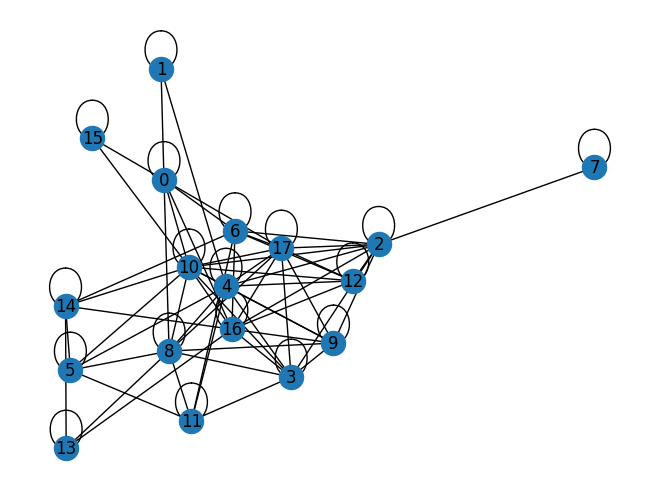

In [30]:
nx.draw(result_graph, with_labels=True)